In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch

# Data frames

In [107]:
url_base = 'https://raw.githubusercontent.com/Seikened/semestre_IV/refs/heads/main/graphic_visualization/proyecto_final/data/'
ds_alohondiga =url_base + 'alhondiga_930.csv'
ds_basilica =url_base + 'basilica_colegiata_560.csv'
ds_callejon =url_base + 'callejon_del_beso_1360.csv'
ds_casadiego =url_base + 'casa_de_diego_rivera_698.csv'
ds_jardin =url_base + 'jardin_de_la_union_1134.csv'
ds_mercado =url_base + 'mercado_hidalgo_600.csv'
ds_monumento =url_base + 'monumento_pipila_1620.csv'
ds_museo =url_base + 'museo_de_las_momias_1650.csv'
ds_teatro =url_base + 'teatro_juarez_1010.csv'
ds_universidad =url_base + 'universidad_de_guanajuato_900.csv'



# Dataframe de cada lugar
df_alhondiga = pd.read_csv(ds_alohondiga)
df_basilica = pd.read_csv(ds_basilica)
df_callejon = pd.read_csv(ds_callejon)
df_casadiego = pd.read_csv(ds_casadiego)
df_jardin = pd.read_csv(ds_jardin)
df_mercado = pd.read_csv(ds_mercado)
df_monumento = pd.read_csv(ds_monumento)
df_museo = pd.read_csv(ds_museo)
df_teatro = pd.read_csv(ds_teatro)
df_universidad = pd.read_csv(ds_universidad)

In [108]:
lista_lugares = (
    'Alhóndiga',
    'Basílica\n Colegiata',
    'Callejón\n del Beso',
    'Casa de\n Diego Rivera',
    'Jardín de\n la Unión',
    'Mercado\n Hidalgo',
    'Monumento\n Pípila',
    'Museo de \n las Momias',
    'Teatro \n Juárez',
    'Universidad de\n Guanajuato'
)

lugares_data = {
    'Alhóndiga': df_alhondiga,
    'Basílica \nColegiata': df_basilica,
    'Callejón del\nBeso': df_callejon,
    'Casa de\nDiego Rivera': df_casadiego,
    'Jardín de\nla Unión': df_jardin,
    'Mercado\nHidalgo': df_mercado,
    'Monumento\nPípila': df_monumento,
    'Museo de\nlas Momias': df_museo,
    'Teatro\nJuárez': df_teatro,
    'Universidad de\nGuanajuato': df_universidad
}

In [109]:
for site_name, df in lugares_data.items():
    df['sitio'] = site_name

all_sites = pd.concat(lugares_data.values(), ignore_index=True)
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Género                    10462 non-null  object 
 1   Edad                      9747 non-null   float64
 2   Nacional ó Internacional  10462 non-null  object 
 3   Calificación              10462 non-null  object 
 4   Escala                    10462 non-null  int64  
 5   Número de aportaciones    10461 non-null  float64
 6   Título de la opinión      10462 non-null  object 
 7   Opinión                   10462 non-null  object 
 8   País                      10462 non-null  object 
 9   Idioma                    10462 non-null  object 
 10  Dispositivo               10462 non-null  object 
 11  Fecha                     10462 non-null  object 
 12  sitio                     10462 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


In [110]:
df_alhondiga['Edad'].mean()

np.float64(40.706593406593406)

In [111]:
lista_edades = []
for lugar in lugares_data:
    promedio_edad = lugares_data[lugar]['Edad'].mean()
    lista_edades.append(round(promedio_edad))
print(lista_edades)

[41, 42, 39, 44, 41, 41, 38, 39, 42, 39]


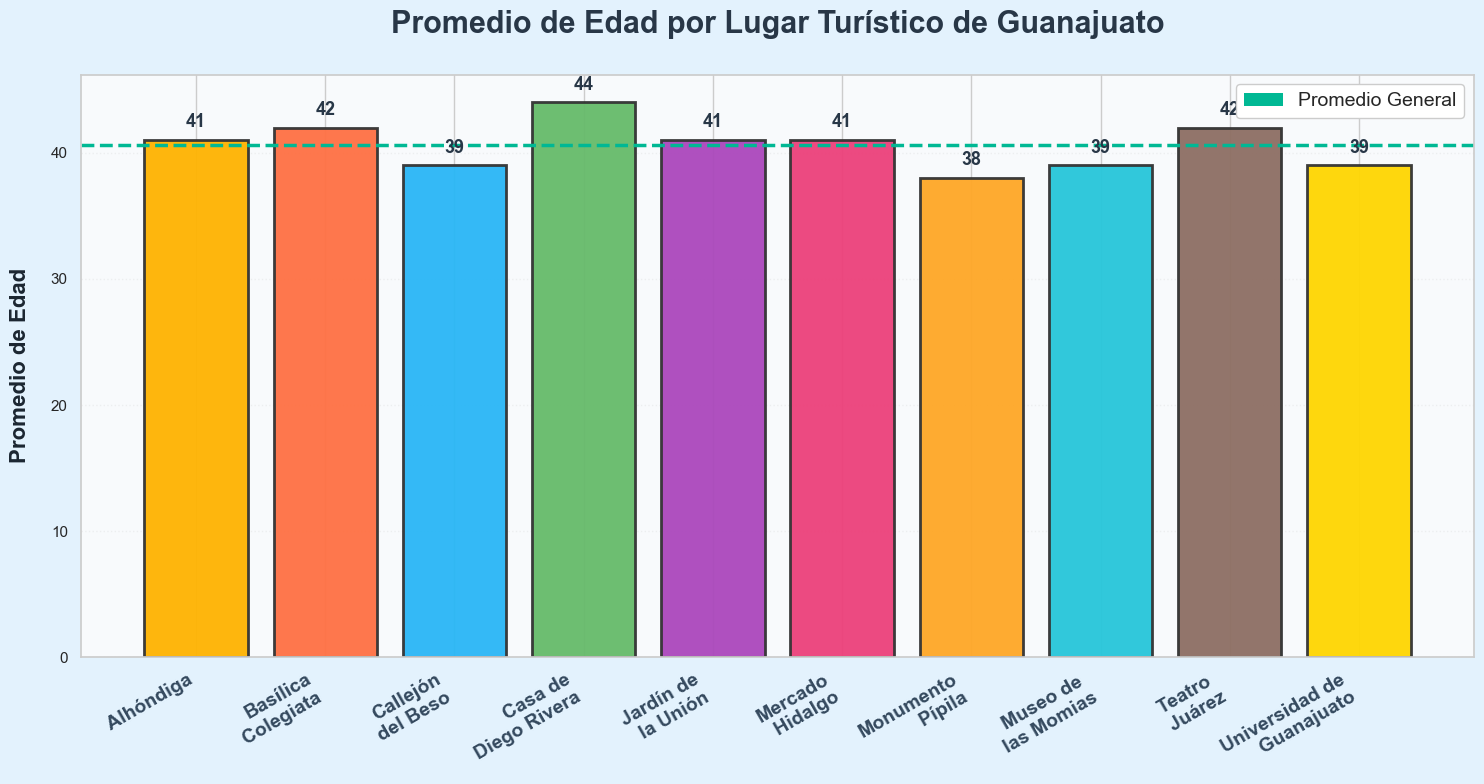

In [112]:
plt.figure(figsize=(15, 8))

# Paleta de colores vibrantes inspirada en turismo
turismo_colors = [
    "#FFB300", # Amarillo sol
    "#FF7043", # Naranja cálido
    "#29B6F6", # Azul cielo
    "#66BB6A", # Verde naturaleza
    "#AB47BC", # Morado fiesta
    "#EC407A", # Rosa mexicano
    "#FFA726", # Naranja atardecer
    "#26C6DA", # Turquesa
    "#8D6E63", # Café tierra
    "#FFD600"  # Amarillo brillante
]

barras = plt.bar(lista_lugares, lista_edades, 
                 color=turismo_colors, 
                 edgecolor='#333', linewidth=2, alpha=0.95)

plt.title('Promedio de Edad por Lugar Turístico de Guanajuato', fontsize=22, fontweight='bold', pad=30, color='#283747')
plt.ylabel('Promedio de Edad', fontsize=16, fontweight='bold', labelpad=15, color='#1b2631')
plt.grid(axis='y', linestyle=':', alpha=0.25)

plt.gca().set_facecolor('#f8fafc')
plt.gcf().patch.set_facecolor('#e3f2fd')

plt.xticks(rotation=30, ha='right', fontsize=14, fontweight='bold', color='#34495e')

for barra, edad in zip(barras, lista_edades):
    plt.text(barra.get_x() + barra.get_width() / 2, 
             barra.get_height() + 0.7,  
             f'{int(edad)}',  
             ha='center', va='bottom', 
             fontsize=13, fontweight='bold', 
             color='#283747')

promedio = np.mean(lista_edades)
plt.axhline(y=promedio, color='#00b894', linestyle='--', linewidth=2.5, 
            label=f'Promedio General: {promedio:.0f} años')

legend_elements = [
    Patch(facecolor='#00b894', edgecolor='none', label='Promedio General')
]
plt.legend(handles=legend_elements, loc='upper right', framealpha=1, fontsize=14)

plt.tight_layout()
plt.show()

In [113]:
df_alhondiga.Calificación.unique()

array(['Excelente', 'Muy bueno', 'Pésimo', 'Regular', 'Malo'],
      dtype=object)

In [114]:
promedioYDesviacion = all_sites.groupby('sitio').agg(
    promedioCalificacion=('Escala', 'mean'),
    desviacionCalificacion=('Escala', 'std')
).reset_index()
promedioYDesviacion = promedioYDesviacion.sort_values(by='promedioCalificacion', ascending=False)
top_10 = promedioYDesviacion.head(10)
print(top_10)

                        sitio  promedioCalificacion  desviacionCalificacion
8              Teatro\nJuárez              4.702970                0.518146
9  Universidad de\nGuanajuato              4.603333                0.612613
4         Jardín de\nla Unión              4.591711                0.607370
1        Basílica \nColegiata              4.500000                0.668750
0                   Alhóndiga              4.454839                0.745711
6           Monumento\nPípila              4.377778                0.767950
3       Casa de\nDiego Rivera              4.243553                0.804039
2          Callejón del\nBeso              3.995588                0.971247
5            Mercado\nHidalgo              3.948333                0.950703
7        Museo de\nlas Momias              3.675152                1.136495


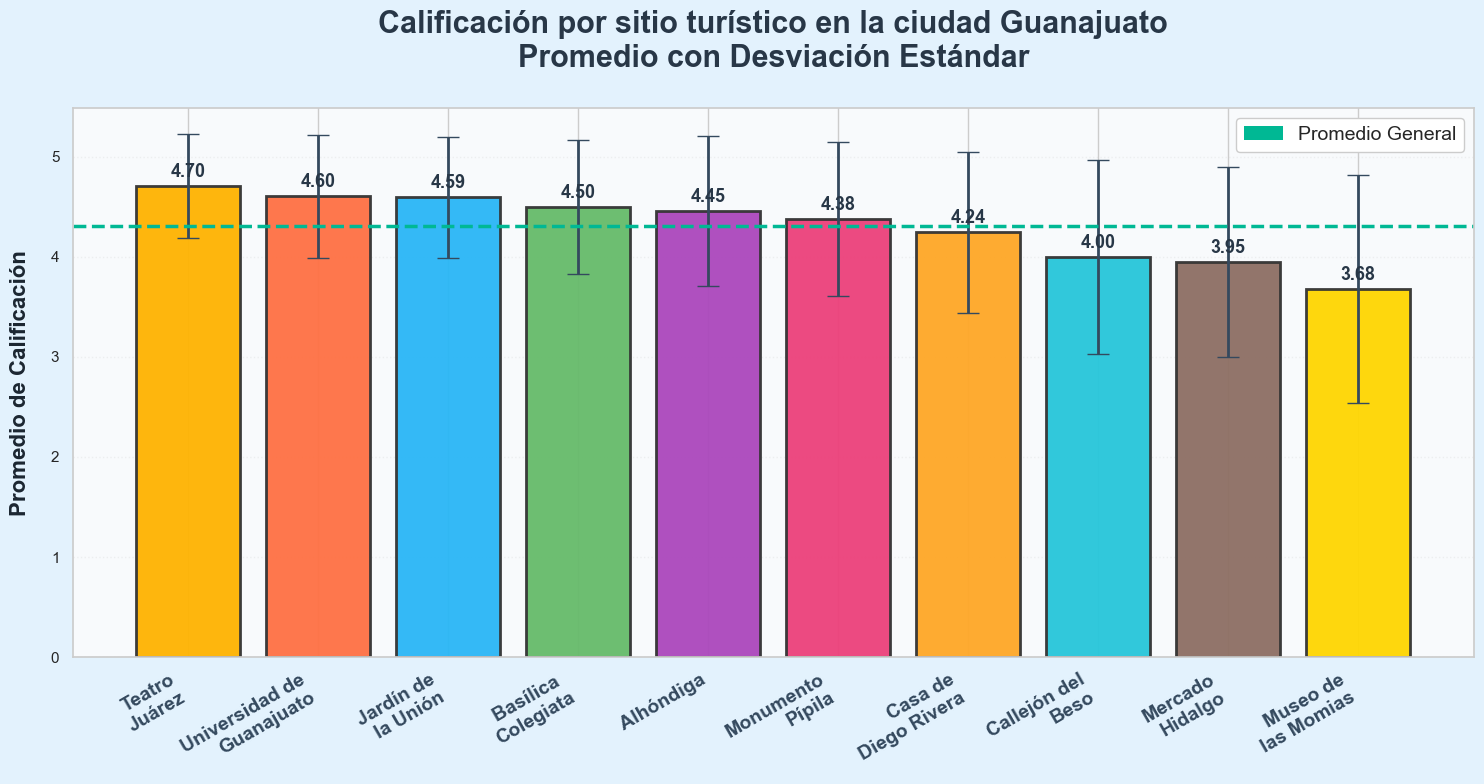

In [115]:
sitios = promedioYDesviacion['sitio']
promedios = promedioYDesviacion['promedioCalificacion']
desviaciones = promedioYDesviacion['desviacionCalificacion']

plt.figure(figsize=(15, 8))

turismo_colors = ['#FFB300', '#FF7043', '#29B6F6', '#66BB6A', '#AB47BC', '#EC407A', '#FFA726', '#26C6DA', '#8D6E63', '#FFD600']

barras = plt.bar(sitios, promedios, 
                 yerr=desviaciones, capsize=8,
                 color=turismo_colors, 
                 edgecolor='#333', linewidth=2, alpha=0.95,
                 error_kw={'elinewidth': 2, 'ecolor': '#34495e'})

plt.title('Calificación por sitio turístico en la ciudad Guanajuato\nPromedio con Desviación Estándar',
          fontsize=22, fontweight='bold', pad=30, color='#283747')
plt.ylabel('Promedio de Calificación', fontsize=16, fontweight='bold', labelpad=15, color='#1b2631')
plt.grid(axis='y', linestyle=':', alpha=0.25)

plt.gca().set_facecolor('#f8fafc')
plt.gcf().patch.set_facecolor('#e3f2fd')

plt.xticks(rotation=30, ha='right', fontsize=14, fontweight='bold', color='#34495e')

for barra, promedio in zip(barras, promedios):
    plt.text(barra.get_x() + barra.get_width() / 2, 
             barra.get_height() + 0.05,  
             f'{promedio:.2f}',  
             ha='center', va='bottom', 
             fontsize=13, fontweight='bold', 
             color='#283747')

promedio_global = np.mean(promedios)
plt.axhline(y=promedio_global, color='#00b894', linestyle='--', linewidth=2.5, 
            label=f'Promedio General: {promedio_global:.2f}')

legend_elements = [
    Patch(facecolor='#00b894', edgecolor='none', label='Promedio General')
]
plt.legend(handles=legend_elements, loc='upper right', framealpha=1, fontsize=14)

plt.tight_layout()
plt.show()

In [116]:
conteo = all_sites['Nacional ó Internacional'].value_counts()
print(conteo)

total_personas = (5639 + 4823) 
nacional = (5639 / total_personas) * 100
internacional = ( 4823 / total_personas) * 100
print(f'Nacional {nacional}, Internacional {internacional}')


Nacional ó Internacional
Nacional         5639
Internacional    4823
Name: count, dtype: int64
Nacional 53.89982794876696, Internacional 46.10017205123304


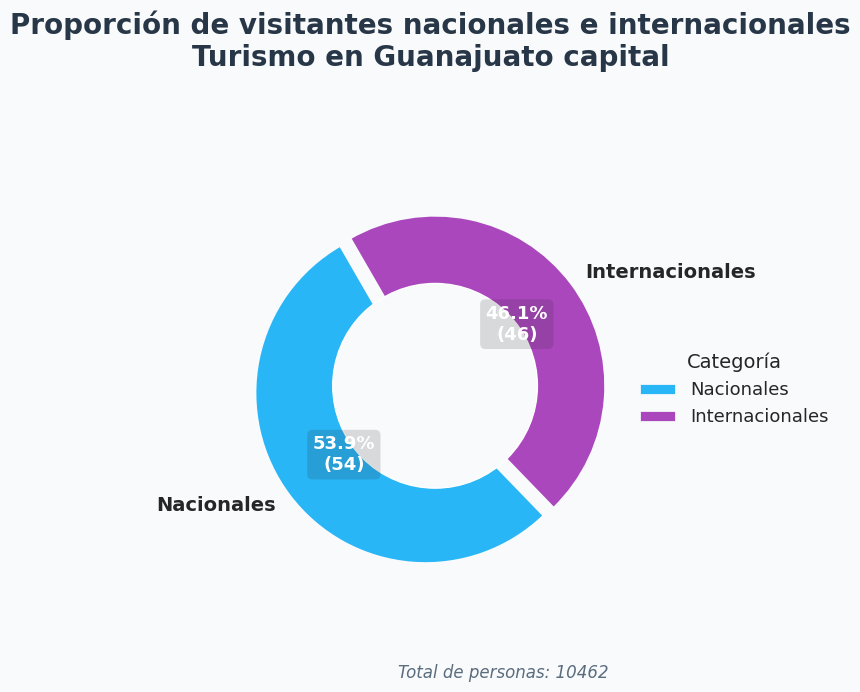

In [117]:
plt.style.use('seaborn-v0_8-pastel')
plt.rcParams['font.family'] = 'DejaVu Sans'

conteo = pd.Series([nacional, internacional], index=['Nacionales', 'Internacionales'])

fig, ax = plt.subplots(figsize=(7, 7), facecolor='#f8fafc')
colors = ['#29B6F6', '#AB47BC']
explode = (0.07, 0)

wedges, texts, autotexts = ax.pie(
    conteo,
    labels=conteo.index,
    colors=colors,
    autopct=lambda p: f'{p:.1f}%\n({int(round(p*sum(conteo)/100))})',
    startangle=120,
    explode=explode,
    shadow=False,
    wedgeprops={'linewidth': 2, 'edgecolor': '#f8fafc'},
    textprops={'fontsize': 14, 'fontweight': 'bold'}
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(13)
    autotext.set_fontweight('bold')
    autotext.set_bbox(dict(facecolor='#222', alpha=0.15, edgecolor='none', boxstyle='round,pad=0.3'))

ax.set_title(
    'Proporción de visitantes nacionales e internacionales\nTurismo en Guanajuato capital',
    fontsize=20, fontweight='bold', pad=28, color='#283747'
)

ax.legend(
    wedges, conteo.index,
    title="Categoría",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=False,
    fontsize=13,
    title_fontsize=14
)

plt.figtext(
    0.5, 0.02,
    f'Total de personas: {total_personas}',
    ha='center', fontsize=12, style='italic', color='#34495e', alpha=0.8
)

centre_circle = plt.Circle((0, 0), 0.60, fc='#f8fafc')
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.tight_layout()
plt.show()

In [118]:
print(all_sites['Género'].unique())
all_sites['Género'] = all_sites['Género'].str.strip().str.capitalize()
hombres_df = all_sites[all_sites['Género'] == 'Masculino']
mujeres_df = all_sites[all_sites['Género'] == 'Femenino']

calificaciones_hombres = hombres_df.groupby('sitio').agg(
    promedio_calificacion=('Escala', 'mean'),
    desviacion_calificacion=('Escala', 'std')
).reset_index()

calificaciones_mujeres = mujeres_df.groupby('sitio').agg(
    promedio_calificacion=('Escala', 'mean'),
    desviacion_calificacion=('Escala', 'std')
).reset_index()

print("Todos los datos de hombres:")
print(calificaciones_hombres.head())

print("\nTodos los datos de mujeres:")
print(calificaciones_mujeres.head())

sitios = calificaciones_hombres['sitio']
promedio_h = calificaciones_hombres['promedio_calificacion']
promedio_m = calificaciones_mujeres['promedio_calificacion']
error_h = calificaciones_hombres['desviacion_calificacion']
error_m = calificaciones_mujeres['desviacion_calificacion']


['Masculino' 'Femenino' ' Masculino' 'masculino']
Todos los datos de hombres:
                   sitio  promedio_calificacion  desviacion_calificacion
0              Alhóndiga               4.463938                 0.733654
1   Basílica \nColegiata               4.438486                 0.684481
2     Callejón del\nBeso               3.952802                 0.989225
3  Casa de\nDiego Rivera               4.240688                 0.791082
4    Jardín de\nla Unión               4.568910                 0.606329

Todos los datos de mujeres:
                   sitio  promedio_calificacion  desviacion_calificacion
0              Alhóndiga               4.443645                 0.761018
1   Basílica \nColegiata               4.580247                 0.640200
2     Callejón del\nBeso               4.038123                 0.951858
3  Casa de\nDiego Rivera               4.246418                 0.817917
4    Jardín de\nla Unión               4.619608                 0.608073


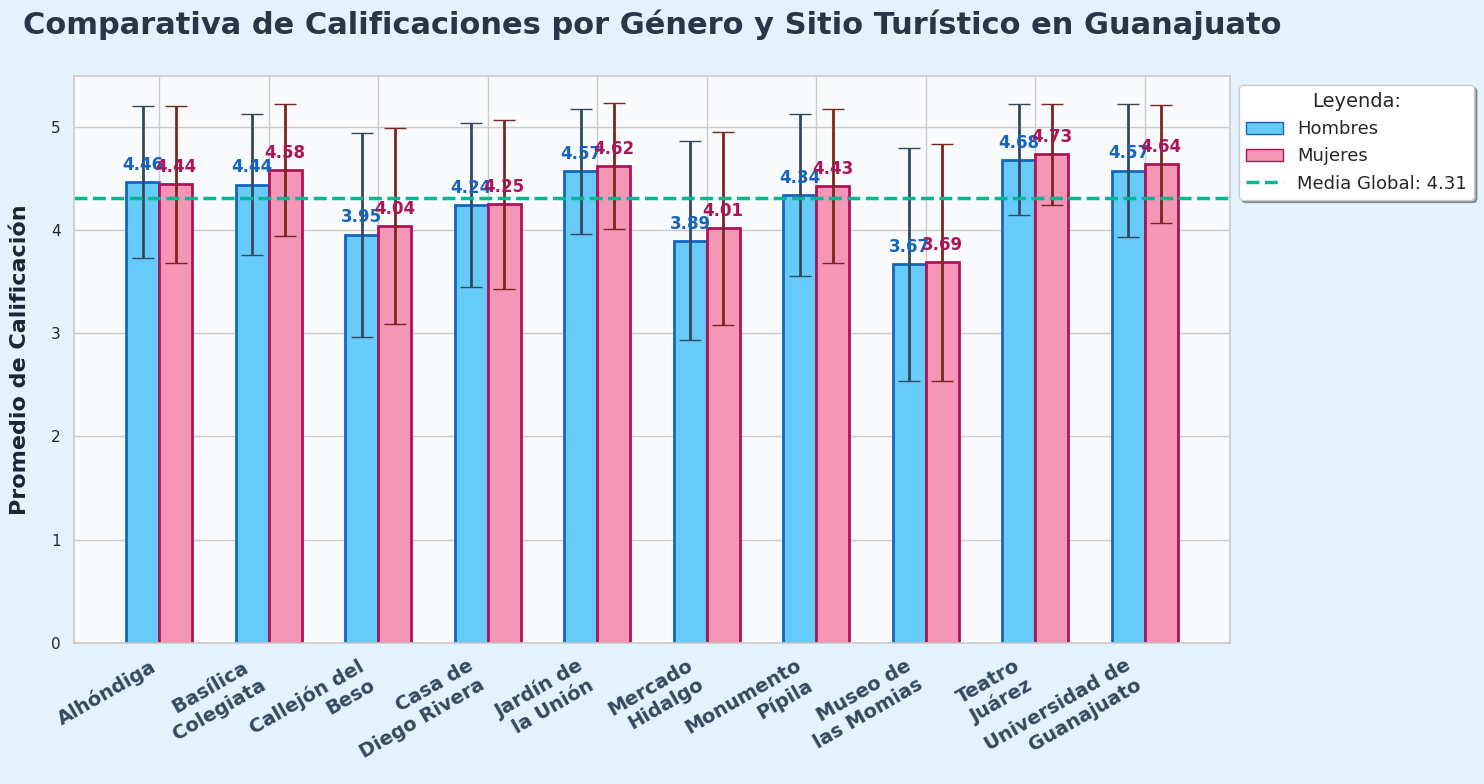

In [119]:
# Paleta de colores alusiva al turismo y diversidad
color_hombres = "#29B6F6"   # Azul vibrante
color_mujeres = "#EC407A"   # Rosa mexicano
color_media = "#00b894"     # Verde para la media

cmap_hombres = LinearSegmentedColormap.from_list('hombres', [color_hombres, "#81d4fa"])
cmap_mujeres = LinearSegmentedColormap.from_list('mujeres', [color_mujeres, "#f8bbd0"])
x = np.arange(len(sitios))
width = 0.30

fig, ax = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor('#e3f2fd')
ax.set_facecolor('#f8fafc')

for i in x:
       ax.bar(i - width/2, promedio_h[i], width, 
                 color=cmap_hombres(0.7), 
                 edgecolor='#1565c0', linewidth=2,
                 yerr=error_h[i], capsize=8, ecolor='#34495e',
                 error_kw={'linewidth': 2})
       ax.bar(i + width/2, promedio_m[i], width,
                 color=cmap_mujeres(0.7),
                 edgecolor='#ad1457', linewidth=2,
                 yerr=error_m[i], capsize=8, ecolor='#78281f',
                 error_kw={'linewidth': 2})

mean_total = np.concatenate([promedio_h, promedio_m]).mean()
ax.axhline(mean_total, color=color_media, linestyle='--', linewidth=2.5, label=f'Media Global: {mean_total:.2f}')


for i in x:
       ax.text(i - width/2, promedio_h[i] + 0.08, f'{promedio_h[i]:.2f}',
                 ha='center', va='bottom', fontsize=12, fontweight='bold', color='#1565c0')
       ax.text(i + width/2, promedio_m[i] + 0.08, f'{promedio_m[i]:.2f}',
                 ha='center', va='bottom', fontsize=12, fontweight='bold', color='#ad1457')

ax.set_ylabel('Promedio de Calificación', fontsize=16, fontweight='bold', labelpad=15, color='#1b2631')
ax.set_title('Comparativa de Calificaciones por Género y Sitio Turístico en Guanajuato', 
                      fontsize=22, fontweight='bold', pad=30, color='#283747')
ax.set_xticks(x)
ax.set_xticklabels(sitios, rotation=30, ha='right', fontsize=14, fontweight='bold', color='#34495e')

legend_elements = [
       Patch(facecolor=cmap_hombres(0.7), edgecolor='#1565c0', label='Hombres'),
       Patch(facecolor=cmap_mujeres(0.7), edgecolor='#ad1457', label='Mujeres'),
       plt.Line2D([0], [0], color=color_media, linestyle='--', linewidth=2.5, label=f'Media Global: {mean_total:.2f}')
]

ax.legend(handles=legend_elements,
                bbox_to_anchor=(1, 1),  
                loc='upper left',            
                frameon=True,
                shadow=True,
                title='Leyenda:',
                title_fontsize=14,
                fontsize=13,
                borderaxespad=0.5)

plt.tight_layout()
plt.show()

In [120]:
all_sites['sitio'] = all_sites['sitio'].str.replace('\n', '<br>')
all_sites.sitio
all_sites['Fecha'].max()
all_sites['Fecha'].min()
all_sites['Año'] = pd.to_datetime(all_sites['Fecha']).dt.year


# Agrupamos por año y sitio
evolucion_calificaciones = all_sites.groupby(['Año', 'sitio']).agg(
    promedioCalificacion=('Escala', 'mean')
).reset_index()
evolucion_calificaciones = evolucion_calificaciones.sort_values(by='Año', ascending=False)
evolucion_calificaciones.head()

,Año,sitio,promedioCalificacion
106,2018,Universidad de<br>Guanajuato,4.553571
105,2018,Teatro<br>Juárez,4.727273
104,2018,Museo de<br>las Momias,3.655172
103,2018,Monumento<br>Pípila,4.504425
102,2018,Mercado<br>Hidalgo,3.896552


In [121]:
fig = px.bar(
    evolucion_calificaciones,
    x='sitio',
    y='promedioCalificacion',
    color='sitio',
    animation_frame='Año',
    title='Evolución anual del promedio de calificaciones por sitio turístico en Guanajuato',
    labels={'promedioCalificacion': 'Promedio de Calificación', 'sitio': 'Sitio Turístico'},
    range_y=(0, 5.5),
    text='promedioCalificacion',
    color_discrete_sequence=turismo_colors
)

fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='outside',
    marker_line_color='#333',
    marker_line_width=2,
    opacity=0.95
)

fig.update_layout(
    xaxis_tickangle=-30,
    plot_bgcolor='#f8fafc',
    paper_bgcolor='#e3f2fd',
    font=dict(family='DejaVu Sans', size=15, color='#34495e'),
    title_font=dict(size=22, color='#283747', family='DejaVu Sans'),
    margin=dict(l=40, r=40, t=80, b=40),
    transition={'duration': 500},
    showlegend=False,
    xaxis=dict(
        tickfont=dict(size=14, color='#34495e', family='DejaVu Sans')
    ),
    yaxis=dict(
        title_font=dict(size=16, color='#1b2631', family='DejaVu Sans'),
        gridcolor='#b2bec3',
        gridwidth=0.5
    ),
    title={
        'text': '<b>Evolución anual del promedio de calificaciones por sitio turístico en Guanajuato</b>',
        'x':0.5,
        'xanchor': 'center'
    }
)

fig.show()


In [122]:

nacionalidadAño = all_sites[['Nacional ó Internacional', 'Año', 'sitio']].copy()
nacionalidadAño = nacionalidadAño.groupby(['Nacional ó Internacional', 'Año', 'sitio']).size().reset_index(name='conteo')
nacionalidadAño = nacionalidadAño.sort_values(by='Año', ascending=False)
print(nacionalidadAño.head(2))

nacionalidadAño['total_por_año_sitio'] = nacionalidadAño.groupby(['Año', 'sitio'])['conteo'].transform('sum')
nacionalidadAño['porcentaje'] = (nacionalidadAño['conteo'] / nacionalidadAño['total_por_año_sitio']) * 100
print(nacionalidadAño.head(2))

    Nacional ó Internacional   Año                   sitio  conteo
95             Internacional  2018  Basílica <br>Colegiata      31
182                 Nacional  2018               Alhóndiga      30
    Nacional ó Internacional   Año                   sitio  conteo  \
95             Internacional  2018  Basílica <br>Colegiata      31   
182                 Nacional  2018               Alhóndiga      30   

     total_por_año_sitio  porcentaje  
95                    46   67.391304  
182                   59   50.847458  


In [123]:
fig = px.bar(
    nacionalidadAño,
    x='Año',
    y='porcentaje',
    color='Nacional ó Internacional',
    animation_frame='sitio',
    title='Nacionalidad de visitantes por año en Guanajuato capital de 2010 a 2018',
    labels={'porcentaje': 'Porcentaje de Visitantes (%)', 'Año': 'Año'},
    range_y=(0, 100),
    text='porcentaje',
    color_discrete_sequence=['#29B6F6', '#AB47BC']
)

fig.update_traces(
    texttemplate='%{text:.1f}%',
    textposition='outside',
    marker_line_color='#333',
    marker_line_width=2,
    opacity=0.95
)

fig.update_layout(
    xaxis_tickangle=-30,
    plot_bgcolor='#f8fafc',
    paper_bgcolor='#e3f2fd',
    font=dict(family='DejaVu Sans', size=15, color='#34495e'),
    title_font=dict(size=22, color='#283747', family='DejaVu Sans'),
    margin=dict(l=40, r=40, t=80, b=40),
    transition={'duration': 500},
    showlegend=True,
    xaxis=dict(
        tickfont=dict(size=14, color='#34495e', family='DejaVu Sans')
    ),
    yaxis=dict(
        title_font=dict(size=16, color='#1b2631', family='DejaVu Sans'),
        gridcolor='#b2bec3',
        gridwidth=0.5
    ),
    title={
        'text': '<b>Nacionalidad de visitantes por año en Guanajuato capital (2010-2018)</b>',
        'x':0.5,
        'xanchor': 'center'
    }
)

fig.show()


# Nacionalidad vs calificación por sitio
Pregunta a responder: ¿Las personas extranjeras tienden a otorgar mejores calificaciones a los sitios turísticos?

Se realizará una comparación visual mediante una gráfica de barras para analizar si la percepción de los visitantes internacionales influye en la calificación promedio de cada sitio turístico. Así, será posible observar si existen diferencias notables en las evaluaciones al considerar la perspectiva de quienes visitan desde el extranjero.

In [124]:
nacionalidad_calificacion_sitio = all_sites.groupby(['sitio', 'Nacional ó Internacional'])['Escala'].agg(
    Calificacion='mean',
    Desviacion='std',
).reset_index()


nacionalidad_calificacion_sitio.head(25)

,sitio,Nacional ó Internacional,Calificacion,Desviacion
0,Alhóndiga,Internacional,4.496667,0.681815
1,Alhóndiga,Nacional,4.434921,0.774013
2,Basílica <br>Colegiata,Internacional,4.496479,0.659255
3,Basílica <br>Colegiata,Nacional,4.503623,0.679562
4,Callejón del<br>Beso,Internacional,3.853791,0.991060
5,Callejón del<br>Beso,Nacional,4.093052,0.945746
6,Casa de<br>Diego Rivera,Internacional,4.182243,0.818099
7,Casa de<br>Diego Rivera,Nacional,4.340741,0.772799
8,Jardín de<br>la Unión,Internacional,4.583630,0.615558
9,Jardín de<br>la Unión,Nacional,4.599650,0.599650


In [125]:
fig = px.bar(
    nacionalidad_calificacion_sitio,
    x='sitio',
    y='Calificacion',
    color='Nacional ó Internacional',
    barmode='group',
    error_y='Desviacion',
    text='Calificacion',
    title='<b>Calificación Promedio de Sitios Turísticos</b><br><sup>Nacionales vs Internacionales</sup>',
    labels={'Calificacion': 'Calificación promedio', 'sitio': 'Sitio Turístico'},
    hover_data={
        'Calificacion': ':.2f',
        'Desviacion': ':.2f',
        'sitio': True,
        'Nacional ó Internacional': True
    },
    color_discrete_map={
        'Nacional': turismo_colors[2],        # Azul vibrante
        'Internacional': turismo_colors[5]    # Rosa mexicano
    },
    custom_data=['Calificacion', 'Desviacion', 'sitio', 'Nacional ó Internacional']
)

fig.update_traces(
    texttemplate='<b>%{text:.2f}</b>',
    textposition='outside',
    textfont_size=14,
    marker_line_color='#333',
    marker_line_width=2,
    opacity=0.95,
    hovertemplate=(
        "<b>%{customdata[2]}</b><br>"
        "Tipo: %{customdata[3]}<br>"
        "Calificación: %{customdata[0]:.2f}<br>"
        "Desviación: ±%{customdata[1]:.2f}<extra></extra>"
    )
)

fig.update_layout(
    xaxis_tickangle=-30,
    yaxis=dict(
        range=[0, 5.5],
        title='Calificación promedio (1-5)',
        gridcolor='#b2bec3',
        gridwidth=0.5
    ),
    bargap=0.25,
    bargroupgap=0.08,
    plot_bgcolor='#f8fafc',
    paper_bgcolor='#e3f2fd',
    font=dict(family="DejaVu Sans", size=15, color='#34495e'),
    legend=dict(
        title_text='Tipo de visitante',
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
        font=dict(size=14)
    ),
    margin=dict(l=40, r=40, t=80, b=80),
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="DejaVu Sans"
    )
)

fig.show()